# Ukryte Podciągi
![](https://live.staticflickr.com/65535/54327633282_6bc45ba42a_o.png)

*Obraz wygenerowany przy użyciu modelu DALL-E.*

## Wstęp
Od starożytnych wróżbitów interpretujących układ gwiazd po współczesnych kryptografów tropiących ślady ukrytych wiadomości, ludzkość od zawsze poszukiwała sensu w pozornie chaotycznych danych. Czasem kluczowe informacje ukrywają się w drobnych sekwencjach symboli, a ich wartość ujawnia się dopiero po precyzyjnej analizie.

W tym zadaniu wcielisz się w rolę detektywa, poszukującego strukturalnych zależności w zbiorze binarnych ciągów. Będziesz dysponował zbiorem danych zawierającym przykładowe ciągi oraz ich poprawnie obliczone wartości. Twoim celem będzie opracowanie metody analizy ukrytych wzorców pozwalającej na możliwie najprecyzyjniejsze wyznaczanie wartości ciągów niewystępujących w zbiorze.

Mówimy, że ciąg $T$ jest podciągiem $S$ i oznaczamy $T \subseteq S$ jeżeli
$$
T = S_{i_1}S_{i_2} \dots S_{i_k}
$$
Gdzie
$$
1 \leq i_1 < i_2 < \dots < i_k \leq n
$$
Dla $k$ i $n$ będących długościami ciągów $T$ i $S$ odpowiednio, oraz indeksów ($i_1 < i_2 < \dots < i_k$) będących ściśle rosnącym ciągiem liczb naturalnych (niekoniecznie kolejnych).

Rozwiązaniem dla danego ciągu binarnego $S \in \{0,1\}^{n}$ oraz zdefiniowanego zbioru zawierającego kolejno wzorzec i jego wagę $W = \{(T, v):T \in \{0,1\}^{k}, k \le n, v \in Z\}$ jest liczba
$$
\phi(S) = \sum_{(T_{i}, v_{i}) \in W} v_{i} \cdot \text{I} (T_{i})
$$
gdzie $\text{I}(T_{i}) = \begin{cases}
1, & T_{i} \subseteq S \\
0, & T_{i} \subsetneq S
\end{cases}$

Innymi słowy, $\phi(S)$ jest sumą wartości wszystkich ciągów ze zbioru $W$, które są podciągami $S$.

**Przykład:**
Dla zbioru $W = \{(1111, 1), (1010, 2)\}$, mamy:
- $\phi$(0**1111**000) = 1
- $\phi$(1**10**00**1**0**0**) = 2
- $\phi$(0**110110**0) = 3,  ponieważ

  - 1111 $\subseteq$ 0**11**0**11**00

  - 1010 $\subseteq$ 01**101**1**0**0
- $\phi$(01100000) = 0, ponieważ 1111, 1010 $\subsetneq$ 01100000.


## Zadanie
Stwórz model (obiekt typu `nn.Module`) który będzie znajdował wartość $\phi$ dla ciągów ze zbioru danych. Dane treningowe składają się z ciągów $S$ oraz odpowiadających im wartości $\phi(S)$. Zauważ więc, że wzorzec $W$ jest ukryty, a Twoim zadaniem jest przybliżyć $\phi$ bez wiedzy o nim.

Twój model musi przyjmować na wejściu dane w postaci $(\text{batch}, n)$. Natomiast na wyjściu musi zwracać wartości w postaci $(\text{batch}, 1)$ lub $(\text{batch},)$, gdzie $\text{batch}$ to liczba próbek.

### Dane
Dane dostępne dla Ciebie w tym zadaniu to:
* `train_dataset.csv`- plik z danymi na których będziesz trenować swój model
* `val_dataset.csv`- plik z danymi na których przetestujesz swój model

### Kryterium Oceny
Zadanie zostanie ocenione na podstawie metryki [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (Mean Squared Error), która jest jedną z najczęściej stosowanych metryk do oceny jakości regresji.  

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
Gdzie $y_i$ to wartość rzeczywista, a $\hat{y}_i$ to wartość przewidziana przez model. Wartość $i$ to numer próbki, a $n$ to liczba wszystkich próbek.

Ta metryka jest już przez nas zaimplementowana w tym notebooku.

**Ostatecznie Twoje rozwiązanie oceniane będzie na tajnym zbiorze testowym na podstawie metryki MSE.** Zbiór testowy nie różni się znacząco od zbioru walidacyjnego.

- Gdy wartość MSE dla Twojego modelu będzie wynosiła 64 (lub więcej), otrzymasz 0 punktów za zadanie
- Gdy wartość MSE dla Twojego modelu będzie wynosiła 64 (lub mniej), otrzymasz X punktów za zadanie, gdzie X jest zdefiniowane w następujący sposób:
$$
\text{X} = \frac{64 - MSE}{64} \times 100
$$

## Ograniczenia
- Twoje rozwiązanie powinno zawierać model ML/DL z wyuczalnymi parametrami. Rozwiązania czysto algorytmiczne nie będą akceptowane.
- Twoje rozwiazanie będzie testowane na Platformie Konkursowej bez dostępu do internetu oraz w środowisku z GPU.
- Ewaluacja Twojego finalnego rozwiązania na Platformie Konkursowej nie może trwać dłużej niż 4 minut z GPU.
- Twój model może być trenowany maksymalnie przez 4000 iteracji, co odpowiada pojedynczemu przeiterowaniu przez zmienną ```dl``` (patrz na przykładowe rozwiązanie).
- Twój model nie może mieć więcej niż 50000 parametrów.

## Uwagi i Wskazówki
- Każdy z ciągów ma taką samą, ustaloną długość.
- Każdy z szukanych podciągów ma długość krótszą niż długość źródłowych ciągów.
- Rozpatrujemy trzy podciągi. Każdy z nich ma przypisaną wartość, która jest liczbą całkowitą.
- W każdym ciągu znajduje się dowolna liczba podciągów (w tym brak jakiegokolwiek z nich).
- Ciągi i podciągi pochodzą z alfabetu binarnego oraz są reprezentowane w postaci list.

## Pliki Zgłoszeniowe
Ten notebook uzupełniony o Twoje rozwiązanie (patrz klasa `YourModel` oraz trening modelu).

## Ewaluacja
Pamiętaj, że podczas sprawdzania flaga `FINAL_EVALUATION_MODE` zostanie ustawiona na `True`.

Za to zadanie możesz zdobyć pomiędzy 0 a 100 punktów. Liczba punktów, którą zdobędziesz, będzie wyliczona na (tajnym) zbiorze testowym na Platformie Konkursowej na podstawie wyżej wspomnianego wzoru, zaokrąglona do liczby całkowitej. Jeśli Twoje rozwiązanie nie będzie spełniało powyższych kryteriów lub nie będzie wykonywać się prawidłowo, otrzymasz za zadanie 0 punktów.

# Kod Startowy

W tej sekcji inicjalizujemy środowisko poprzez zaimportowanie potrzebnych bibliotek i funkcji. Przygotowany kod ułatwi Tobie efektywne operowanie na danych i budowanie właściwego rozwiązania.

In [23]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI PODCZAS WYSYŁANIA ##########################

FINAL_EVALUATION_MODE = False # Podczas sprawdzania ustawimy tą flagę na True.

In [24]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

import os
import gdown
import pandas
import torch
import numpy as np
import torch.optim as optim
import torch.nn as nn

In [25]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

def seed_everything(seed: int) -> None:
    """
    Ustawia ziarno (seed) dla odtwarzalności wyników w Pythonie, NumPy oraz PyTorch.

    Funkcja ustawia ziarno dla generatorów liczb losowych Pythonie, NumPy oraz PyTorch,
    a także konfiguruje PyTorch do pracy w trybie deterministycznym.

    Parametry:
        seed (int): Wartość ziarna do ustawienia.
    """
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [26]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

seed_everything(12345)

device = 'cuda'
assert torch.cuda.is_available(), "CUDA niedostępna!"

## Ładowanie Danych
Za pomocą poniższego kodu wczytujemy dane zawierające ciągi wraz z ich wartościami.

In [27]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

class CSVDataloader(torch.utils.data.DataLoader):
    """
    Klasa CSVDataloader służy do ładowania danych z plików CSV i zwracania ich w batchach.

    Przyjmuje:
        csv_file (str): Ścieżka do pliku CSV.
        batch_size (int): Rozmiar batcha.
        shuffle (bool): Czy tasować dane.
    """
    def __init__(self, csv_file, batch_size=128, shuffle=True):

        class CSVDataset(torch.utils.data.Dataset):
            """
            Klasa CSVDataset służy do przechowywania danych z plików CSV jako pojedyncze próbki.
            """
            def __init__(self, csv_file: str):
                data = pandas.read_csv(csv_file).values
                self.x = torch.tensor(data[:, :-1], dtype=torch.float32)  # Features
                self.y = torch.tensor(data[:, -1], dtype=torch.float32)  # Labels

            def __len__(self) -> int:
                return len(self.x)

            def __getitem__(self, idx: int) -> tuple:
                return self.x[idx].long(), self.y[idx]

        dataset = CSVDataset(csv_file)
        self.seq_len = dataset.x.shape[1]
        super().__init__(dataset, batch_size=batch_size, shuffle=shuffle)

In [28]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

# Inicjalizacja treningowego zbioru danych
train_dataset_path = "train_dataset.csv"
val_dataset_path = "val_dataset.csv"

if not os.path.exists(train_dataset_path):
    url = "https://drive.google.com/uc?id=1INeYNpPA_YwojuQbMizlsFsERJ-PJX-E"
    gdown.download(url, train_dataset_path, quiet=True)

if not os.path.exists(val_dataset_path):
    url = "https://drive.google.com/uc?id=1oQcOMyDWVX0x76LOyp4TcFip1koRuodN"
    gdown.download(url, val_dataset_path, quiet=True)

dl = CSVDataloader("train_dataset.csv")
val_dl = CSVDataloader("val_dataset.csv")

## Kod z Kryterium Oceniającym

Kod, zbliżony do poniższego, będzie używany do oceny rozwiązania na zbiorze testowym.

In [29]:
######################### NIE ZMIENIAJ TEJ KOMÓRKI ##########################

def mse_criterium(
        estimations: torch.Tensor,
        answers: torch.Tensor
    ) -> torch.Tensor:
    """
    Oblicza wartość funkcji błędu średniokwadratowego (MSE) pomiędzy predykcjami a prawdziwymi wartościami.

    Parametry:
        estimations (torch.Tensor): Predykcje modelu.
        answers (torch.Tensor): Prawdziwe wartości.

    Zwraca:
        torch.Tensor: Wartość funkcji błędu średniokwadratowego.
    """
    return torch.mean((estimations.view(-1) - answers.view(-1)) ** 2)


def validate_model(
        model: torch.nn.Module,
        val_dl: torch.utils.data.DataLoader,
    ) -> float:
    """
    Waliduje model na zbiorze walidacyjnym. Zwraca uśrednioną wartość
    funkcji błędu średniokwadratowego dla wszystkich próbek.

    Parametry:
        model (torch.nn.Module): Model do oceny.
        val_dl (torch.utils.data.DataLoader): DataLoader z danymi walidacyjnymi.

    Zwraca:
        float: Uśredniona wartość funkcji błędu średniokwadr
    """
    model = model.eval().to(device)
    values = []
    for x, y in val_dl:
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)

        mse = mse_criterium(y_pred, y).cpu().item()
        values.append(mse)

    final_value = torch.tensor(values).mean().item()

    return final_value

def estimate_points(mse: float) -> int:
    """
    Funkcja wyznaczająca ilość punktów za zadanie na podstawie wartości funkcji błędu średniokwadratowego.

    Parametry:
        mse (float): Wartość funkcji błędu średniokwadratowego.

    Zwraca:
        int: Ilość punktów za zadanie (0 - 100).
    """
    points = max((100 * (64 - mse)) / 64, 0)
    return int(round(points))

# Modelowe Rozwiązanie

Poniższe rozwiązanie przechodzi przez cały proces uczenia maszynowego, od eksploracji danych po ewaluację modelu na zbiorze walidacyjnym.
Naszym celem jest przewidzenie wartości liczbowej ($\phi(S)$) dla danego ciągu binarnego (S). Kluczowe jest to, że wartość ta zależy od obecności ukrytych, nieciągłych podciągów. To od razu sugeruje, że kolejność elementów ma znaczenie, ale niekoniecznie ich bezpośrednie sąsiedztwo.

Rozwiązanie zostało podzielone na poszczególne kroki:

* [1. Eksploracja danych](#1.-Eksploracja-danych)
  * [1.1 Podstawowe informacje](#11-Podstawowe-informacje)
  * [1.2 Analiza zmiennej docelowej](#12-Analiza-zmiennej-docelowej)
  * [1.3 Walidacja i Czyszczenie Danych](#13-Walidacja-i-Czyszczenie-Danych)
  * [1.4 Wizualizacja ciągów dla różnych wartości $\phi(S)$](#14-Wizualizacja-ciągów-dla-różnych-wartości-phiS)
  * [1.5 Analiza Statystyczna Różnicująca Wartości](#15-Analiza-Statystyczna-Różnicująca-Wartości)
  * [1.6 Weryfikacja Spójności Zbiorów Danych](#16-Weryfikacja-Spójności-Zbiorów-Danych)
* [2. Wybór Architektury Modelu](#2.-Wybór-Architektury-Modelu)
* [3. Implementacja Modelu i Pętli Treningowej](#3.-Implementacja-Modelu-i-Pętli-Treningowej)
  * [3.1 Definicja klasy YourModel (Model Bazowy v1)](#31-Definicja-klasy-YourModel-Model-Bazowy-v1)
  * [3.2 Cykl uczenia i ewaluacji](#32-Cykl-uczenia-i-ewaluacji)
  * [3.3 Ewaluacja przy użyciu kodu "Kryterium Oceniające" z zadania](#33-Ewaluacja-przy-użyciu-kodu-Kryterium-Oceniające-z-zadania)
  * [3.4 Analiza Wyniku](#34-Analiza-Wyniku)
* [4. Analiza Błędów](#4.-Analiza-Błędów)
* [5. Iteracyjne Ulepszanie Modelu](#5.-Iteracyjne-Ulepszanie-Modelu)
  * [5.1 Diagnoza Problemu i Hipoteza](#51-Diagnoza-Problemu-i-Hipoteza)
  * [5.2 Propozycja Zmiany: Model z Mechanizmem Uwagi](#52-Propozycja-Zmiany-Model-z-Mechanizmem-Uwagi)
  * [5.3 Implementacja i Ponowna Ewaluacja](#53-Implementacja-i-Ponowna-Ewaluacja)
  * [5.4 Analiza Wyników (Model v2)](#54-Analiza-Wyników-Model-v2)
* [6. Model Klasyfikacyjny - Od Regresji do Klasyfikacji](#6.-Model-Klasyfikacyjny---Od-Regresji-do-Klasyfikacji)
  * [6.1 Przypomnienie analizy z punktu 1.2](#61-Przypomnienie-analizy-z-punktu-12)
  * [6.2 Analiza błędów modelu regresyjnego v2](#62-Analiza-błędów-modelu-regresyjnego-v2)
  * [6.3 Implementacja modelu klasyfikacyjnego](#63-Implementacja-modelu-klasyfikacyjnego)
  * [6.4 Trening modelu klasyfikacyjnego](#64-Trening-modelu-klasyfikacyjnego)
  * [6.5 Analiza Wyników (Model v3)](#65-Analiza-Wyników-Model-v3)
* [7. Bonus - Inne Podejścia do Rozwiązania](#7.-Bonus---Inne-Podejścia-do-Rozwiązania)


In [30]:
import matplotlib.pyplot as plt

## 1. Eksploracja danych
Zanim zaczniemy budować model, musimy zrozumieć dane, z którymi pracujemy. Celem tego etapu jest poznanie struktury danych wejściowych i wyjściowych.

### 1.1 Podstawowe informacje
Zaczynamy od sprawdzenia podstawowych parametrów naszych zbiorów danych.

In [31]:
# Pobranie przykładowej paczki danych w celu sprawdzenia wymiarów
sample_x, sample_y = next(iter(dl))

print(f"Kształt danych wejściowych (batch, długość sekwencji): {sample_x.shape}")
print(f"Kształt danych wyjściowych (batch,): {sample_y.shape}")
print(f"Długość pojedynczej sekwencji: {dl.seq_len}")
print(f"Liczba próbek w zbiorze treningowym: {len(dl.dataset)}")
print(f"Liczba próbek w zbiorze walidacyjnym: {len(val_dl.dataset)}")

Kształt danych wejściowych (batch, długość sekwencji): torch.Size([128, 24])
Kształt danych wyjściowych (batch,): torch.Size([128])
Długość pojedynczej sekwencji: 24
Liczba próbek w zbiorze treningowym: 511999
Liczba próbek w zbiorze walidacyjnym: 511999


### 1.2 Analiza zmiennej docelowej
Kluczowe jest zrozumienie, jakie wartości staramy się przewidzieć. Sprawdźmy rozkład wartości $\phi(S)$ w zbiorze treningowym.

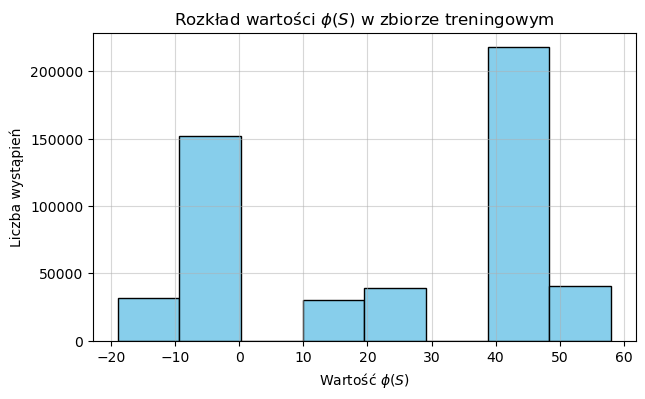

Unikalne wartości w zbiorze treningowym: [-19.0, -8.0, 0.0, 11.0, 28.0, 39.0, 47.0, 58.0]
Liczba unikalnych wartości: 8


In [32]:
# Zbieramy wszystkie etykiety ze zbioru treningowego
all_labels = []
for _, y in dl:
    all_labels.extend(y.tolist())

# Tworzymy histogram
plt.figure(figsize=(7, 4))
plt.hist(all_labels, bins=len(set(all_labels)), color='skyblue', edgecolor='black')
plt.title(r'Rozkład wartości $\phi(S)$ w zbiorze treningowym')
plt.xlabel(r'Wartość $\phi(S)$')
plt.ylabel('Liczba wystąpień')
plt.grid(True, alpha=0.5)
plt.show()

# Wyświetlamy unikalne wartości
unique_labels = sorted(list(set(all_labels)))
print(f"Unikalne wartości w zbiorze treningowym: {unique_labels}")
print(f"Liczba unikalnych wartości: {len(unique_labels)}")

### 1.3 Walidacja i Czyszczenie Danych
Ten etap to kontrola jakości naszych danych. Zanim przejdziemy do zaawansowanych analiz, musimy mieć pewność, że dane są kompletne, spójne i nie zawierają technicznych błędów.

In [33]:
print("=== Walidacja Schematu i Jakości Danych ===")

# a) Sprawdzenie, czy dane zawierają tylko wartości 0 i 1
is_binary = np.all(np.isin(dl.dataset.x.numpy(), [0, 1]))
assert is_binary, "Błąd: Dane wejściowe zawierają wartości inne niż 0 i 1!"
print("Walidacja zawartości danych (0/1): OK")

# b) Sprawdzenie kompletności danych (brakujące wartości)
missing_values_x = np.isnan(dl.dataset.x.numpy()).sum()
missing_values_y = np.isnan(dl.dataset.y.numpy()).sum()
total_missing = missing_values_x + missing_values_y
assert total_missing == 0, f"Błąd: Znaleziono {total_missing} brakujących wartości!"
print(f"Sprawdzenie brakujących wartości: Znaleziono {total_missing} braków. OK")

=== Walidacja Schematu i Jakości Danych ===
Walidacja zawartości danych (0/1): OK
Sprawdzenie brakujących wartości: Znaleziono 0 braków. OK


### 1.4 Wizualizacja ciągów dla różnych wartości $\phi(S)$
Aby zbudować intuicję, zwizualizujmy kilka przykładowych ciągów dla różnych wartości docelowych. Może to pomóc dostrzec pewne wzorce.

In [51]:
# Grupujemy próbki według ich etykiet
grouped_samples = {}
for x, y in dl.dataset:
    label = y.item()
    if label not in grouped_samples:
        grouped_samples[label] = []
    grouped_samples[label].append(x.numpy())

# Wyświetlamy po 3 przykłady dla kilku wybranych etykiet
labels_to_show = sorted(list(grouped_samples.keys()))[0:5] # Pokażmy dla 5 pierwszych wartości

for label in labels_to_show:
    print(f"--- Przykłady dla phi(S) = {label} ---")
    samples = grouped_samples[label]
    for i in range(min(3, len(samples))):
        # Konwertujemy numpy array na string dla czytelności
        print(f"  Przykład {i+1}: {''.join(map(str, map(int, samples[i])))}")

--- Przykłady dla phi(S) = -19.0 ---
  Przykład 1: 010111000100010000010001
  Przykład 2: 111001111010111010111110
  Przykład 3: 100001011100100010010111
--- Przykłady dla phi(S) = -8.0 ---
  Przykład 1: 001111110001001010100011
  Przykład 2: 001000001110110101000011
  Przykład 3: 011010110000010110100110
--- Przykłady dla phi(S) = 0.0 ---
  Przykład 1: 111001010001100000010001
  Przykład 2: 000000010001001111111111
  Przykład 3: 110110101101000000001000
--- Przykłady dla phi(S) = 11.0 ---
  Przykład 1: 001001111011011100000111
  Przykład 2: 111101101011010000100010
  Przykład 3: 110110111100111001110000
--- Przykłady dla phi(S) = 28.0 ---
  Przykład 1: 111010110110010111010100
  Przykład 2: 110010110100010011001010
  Przykład 3: 110000011010100010111011


### 1.5 Analiza Statystyczna Różnicująca Wartości
Czy istnieje prosta zależność statystyczna między ciągiem a jego wartością? Sprawdźmy, czy średnia liczba jedynek w ciągu koreluje z wartością $\phi(S)$.

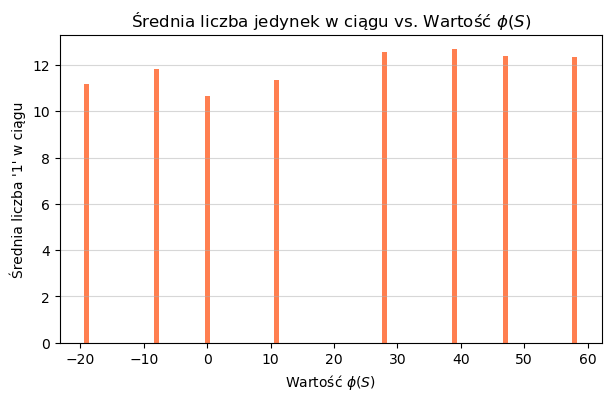

In [35]:
# Obliczamy średnią liczbę jedynek dla każdej wartości docelowej
mean_ones_per_label = {}
for label, samples in grouped_samples.items():
    mean_ones = np.mean([np.sum(s) for s in samples])
    mean_ones_per_label[label] = mean_ones

# Wykres
plt.figure(figsize=(7, 4))
plt.bar(mean_ones_per_label.keys(), mean_ones_per_label.values(), color='coral')
plt.title(r'Średnia liczba jedynek w ciągu vs. Wartość $\phi(S)$')
plt.xlabel(r'Wartość $\phi(S)$')
plt.ylabel('Średnia liczba \'1\' w ciągu')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

### 1.6 Weryfikacja Spójności Zbiorów Danych
Sprawdzamy, czy zbiór treningowy i walidacyjny pochodzą z tej samej dystrybucji statystycznej. Jeśli tak nie jest, ocena modelu na zbiorze walidacyjnym byłaby niewiarygodna.

In [36]:
# Porównanie statystyk zmiennej docelowej (y)
train_y_mean, train_y_std = np.mean(all_labels), np.std(all_labels)
val_labels = []
for _, y in val_dl:
    val_labels.extend(y.tolist())
val_y_mean, val_y_std = np.mean(val_labels), np.std(val_labels)

# Porównanie statystyk danych wejściowych (x)
train_x_mean = dl.dataset.x.numpy().mean()
val_x_mean = val_dl.dataset.x.numpy().mean()

print("--- Porównanie statystyk opisowych zbiorów danych ---")
print(f"                           | Zbiór Treningowy | Zbiór Walidacyjny")
print(f"-------------------------|------------------|--------------------")
print(f"Średnia wartość phi(S)   | {train_y_mean:^16.2f} | {val_y_mean:^18.2f}")
print(f"Odch. std. phi(S)      | {train_y_std:^16.2f} | {val_y_std:^18.2f}")
print(f"Średnia wartość bitu     | {train_x_mean:^16.2f} | {val_x_mean:^18.2f}")

--- Porównanie statystyk opisowych zbiorów danych ---
                           | Zbiór Treningowy | Zbiór Walidacyjny
-------------------------|------------------|--------------------
Średnia wartość phi(S)   |      22.67       |       22.70       
Odch. std. phi(S)      |      24.24       |       24.24       
Średnia wartość bitu     |       0.50       |        0.50       


### Wnioski z eksploracji:

* **Jakość danych:** Dane są czyste, binarne i kompletne.
* **Wizualizacja:** Na pierwszy rzut oka trudno dostrzec wzorce ręcznie, co potwierdza potrzebę użycia uczenia maszynowego.
* **Statystyki:** Nie ma prostej, liniowej zależności między liczbą jedynek a wartością docelową. Wskazuje to na bardziej złożone, sekwencyjne wzorce.
* **Spójność zbiorów:** Zbiory treningowy i walidacyjny mają bardzo zbliżone charakterystyki statystyczne. Oznacza to, że zbiór walidacyjny jest reprezentatywny i możemy mu ufać podczas oceny modelu.

## 2. Wybór Architektury Modelu
Wybór odpowiedniej architektury jest kluczowy. Poniższa tabela porównuje kandydatów i uzasadnia nasz wybór.

| Architektura | Zalety | Wady | Zastosowanie w tym zadaniu |
| :--- | :--- | :--- | :--- |
| **MLP (Multi-Layer Perceptron)** | Prosta w implementacji. | Ignoruje strukturę sekwencyjną danych. Traktuje wejście jako "worek bitów". | Słaby kandydat. Nie nadaje się do problemów, gdzie kolejność ma znaczenie. |
| **CNN (Sieć Konwolucyjna)** | Skuteczna w wykrywaniu lokalnych wzorców (np. '110'). | Ma trudności z zależnościami na dużą odległość (np. pierwszy i ostatni bit ciągu). | Możliwy, ale nieoptymalny. Mógłby znaleźć fragmenty wzorców, ale nie całe nieciągłe podciągi. |
| **RNN/LSTM (Sieć Rekurencyjna)** | Zaprojektowana do pracy z sekwencjami. Posiada "pamięć" do śledzenia zależności w czasie. | Może mieć problem z zanikającym/wybuchającym gradientem (zwłaszcza proste RNN). | **Najlepszy kandydat.** LSTM jest dobrze dopasowany do natury problemu. |

**Decyzja:** Zaczniemy od LSTM, ponieważ ten typ sieci dobrze radzi sobie z danymi sekwencyjnymi i potrafi zapamiętywać zależności między odległymi elementami ciągu. Wybieramy wersję dwukierunkową, aby model mógł analizować sekwencję jednocześnie od początku i od końca, co pozwala mu lepiej wykrywać ukryte wzorce niezależnie od ich położenia w ciągu.

## 3. Implementacja Modelu i Pętli Treningowej
Mając wybraną architekturę, możemy przystąpić do implementacji.

### 3.1 Definicja klasy YourModel (Model Bazowy v1)
Poniżej znajduje się implementacja modelu opartego na dwukierunkowej sieci LSTM.

In [37]:
class YourModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, dropout_prob):
        super(YourModel, self).__init__()

        # Definicja warstwy embedding - zamienia 0/1 na gęste wektory.
        # Słownik ma 2 tokeny (0 i 1), a każdy z nich będzie reprezentowany przez wektor o długości `input_dim`.
        self.embedding = nn.Embedding(2, input_dim)

        # Definicja dwukierunkowej warstwy LSTM.
        # `bidirectional=True` sprawia, że sieć przetwarza dane w obu kierunkach.
        # `batch_first=True` oznacza, że dane wejściowe będą miały wymiar (batch, seq_len, features)
        self.lstm = nn.LSTM(input_size=input_dim,
                              hidden_size=hidden_dim,
                              num_layers=n_layers,
                              batch_first=True,
                              dropout=dropout_prob if n_layers > 1 else 0,
                              bidirectional=True)

        # Warstwa w pełni połączona (regresyjna) na wyjściu.
        # Wejście ma rozmiar `hidden_dim * 2`, ponieważ LSTM jest dwukierunkowy
        # (łączymy stany ukryte z obu kierunków).
        self.fc = nn.Linear(hidden_dim * 2, 1)

    def forward(self, x):
        # x ma wymiar (batch_size, seq_len)

        # Przekształcamy x na typ long, wymagany przez warstwę Embedding
        x = x.long()

        # Embedding: (batch_size, seq_len) -> (batch_size, seq_len, input_dim)
        embedded = self.embedding(x)

        # LSTM: zwraca output i (hidden_state, cell_state)
        # output ma wymiar (batch_size, seq_len, hidden_dim * 2)
        lstm_out, _ = self.lstm(embedded)

        # Chcemy użyć tylko wyjścia z ostatniego kroku czasowego do predykcji.
        # lstm_out[:, -1, :] wybiera wyjścia dla wszystkich batchy, ale tylko z ostatniego kroku.
        # Wymiar: (batch_size, hidden_dim * 2)
        last_hidden_state = lstm_out[:, -1, :]

        # Warstwa w pełni połączona: (batch_size, hidden_dim * 2) -> (batch_size, 1)
        out = self.fc(last_hidden_state)

        return out

### 3.2 Cykl uczenia i ewaluacji

Poniżej znajduje się kompletna **pętla treningowa**.
W każdej iteracji model:

1. **Dostaje porcję danych (batch)** i na jej podstawie **oblicza przewidywaną wartość** — to tzw. *przejście w przód* (ang. *forward pass*).
2. **Porównuje swoje przewidywania z prawdziwymi wartościami** za pomocą funkcji błędu, która mówi, jak bardzo się pomylił. Używamy funkcji `nn.MSELoss`, ponieważ robi dokładnie to samo co `mse_criterium`, ale jest szybsza i przystosowana do uczenia modeli w PyTorch (obsługuje gradienty i GPU).
3. **Uczy się na błędach** — oblicza, jak zmienić swoje wewnętrzne parametry, żeby następnym razem pomylić się mniej (to tzw. *propagacja wsteczna*).
4. **Aktualizuje wagi** przy pomocy `optimizer`, czyli mechanizmu, który krok po kroku poprawia działanie modelu.

Co pewną liczbę kroków pętla wykonuje też **walidację** — sprawdza, jak dobrze model radzi sobie na osobnym zbiorze danych (walidacyjnym), na których nie był uczony.

In [38]:
# Hiperparametry modelu i treningu
INPUT_DIM = 32      # Wymiar wektora embedding
HIDDEN_DIM = 32     # Rozmiar warstwy ukrytej LSTM
N_LAYERS = 2        # Liczba warstw LSTM
DROPOUT = 0.3       # Prawdopodobieństwo dropout
LEARNING_RATE = 0.001
ITERATIONS = 4000   # Zgodnie z ograniczeniami zadania

# Inicjalizacja modelu, optymalizatora i funkcji straty
your_model_v1 = YourModel(INPUT_DIM, HIDDEN_DIM, N_LAYERS, DROPOUT).to(device)
optimizer = optim.Adam(your_model_v1.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

# Sprawdzenie liczby parametrów
num_params = sum(p.numel() for p in your_model_v1.parameters() if p.requires_grad)
print(f"Liczba parametrów w modelu: {num_params}")
if num_params > 50000:
    print("OSTRZEŻENIE: Model przekracza limit 50 000 parametrów!")

# Listy do przechowywania historii treningu
train_losses = []
val_mses = []

# Ustawienie modelu w tryb treningowy
your_model_v1.train()

# Pętla treningowa
train_iterator = iter(dl)
for i in range(ITERATIONS):
    try:
        inputs, targets = next(train_iterator)
    except StopIteration:
        train_iterator = iter(dl)
        inputs, targets = next(train_iterator)

    inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)

    optimizer.zero_grad()
    outputs = your_model_v1(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Okresowa walidacja
    if (i + 1) % 500 == 0:
        val_mse = validate_model(your_model_v1, val_dl)
        val_mses.append(val_mse)
        # Przełączamy z powrotem na tryb treningowy po walidacji
        your_model_v1.train()
        print(f"Iteracja {i+1}/{ITERATIONS}, Strata treningowa: {loss.item():.4f}, "
              f"MSE walidacyjne: {val_mse:.4f}")

print("Trening zakończony.")


Liczba parametrów w modelu: 42113
Iteracja 500/4000, Strata treningowa: 592.4191, MSE walidacyjne: 588.7750
Iteracja 1000/4000, Strata treningowa: 626.8878, MSE walidacyjne: 545.5281
Iteracja 1500/4000, Strata treningowa: 227.1670, MSE walidacyjne: 188.1693
Iteracja 2000/4000, Strata treningowa: 83.3249, MSE walidacyjne: 73.4126
Iteracja 2500/4000, Strata treningowa: 72.5820, MSE walidacyjne: 70.1778
Iteracja 3000/4000, Strata treningowa: 85.4650, MSE walidacyjne: 67.1745
Iteracja 3500/4000, Strata treningowa: 90.1723, MSE walidacyjne: 62.5866
Iteracja 4000/4000, Strata treningowa: 47.1087, MSE walidacyjne: 56.3366
Trening zakończony.


### 3.3 Ewaluacja przy użyciu kodu "Kryterium Oceniające" z zadania
Sprawdźmy, ile punktów zdobyłby nasz model na zbiorze walidacyjnym.

In [39]:
final_val_mse = validate_model(your_model_v1, val_dl)
final_score = estimate_points(final_val_mse)

print(f"Finalne MSE na zbiorze walidacyjnym (v1): {final_val_mse:.4f}")
print(f"Estymowane punkty za zadanie (v1): {final_score}")

Finalne MSE na zbiorze walidacyjnym (v1): 56.3366
Estymowane punkty za zadanie (v1): 12


### 3.4 Analiza Wyniku
Nawet prosty model bazowy osiąga wynik poniżej progu 64.0 wymaganego do zdobycia punktów. Oznacza to, że średni kwadrat błędu predykcji jest bardzo niski, a model nauczył się z dużą precyzją odwzorowywać funkcję $\phi(S)$. Jednak w duchu iteracyjnego ulepszania, zbadajmy jego potencjalne słabości.

## 4. Analiza Błędów
Aby jeszcze lepiej zrozumieć działanie naszego modelu, możemy przeanalizować przypadki, w których popełnił on największe błędy.

In [40]:
# Ustawienie modelu w tryb ewaluacji
your_model_v1.eval()
errors = []
with torch.no_grad():
    for i, (x, y) in enumerate(val_dl.dataset):
        # Przygotowanie pojedynczej próbki do predykcji
        x_tensor = x.unsqueeze(0).to(device)

        pred = your_model_v1(x_tensor).squeeze().cpu().item()
        true = y.item()
        error = (pred - true)**2

        errors.append({
            'index': i,
            'sequence': ''.join(map(str, map(int, x.numpy()))),
            'true': true,
            'pred': pred,
            'error_sq': error
        })

# Sortowanie błędów od największego do najmniejszego
errors.sort(key=lambda item: item['error_sq'], reverse=True)

# Wyświetlenie 5 największych błędów
print("--- 5 próbek z największym błędem predykcji (MSE) ---")
for i in range(min(5, len(errors))):
    e = errors[i]
    print(f" Indeks: {e['index']}, Prawdziwa wartość: {e['true']:.2f}, Przewidziana: {e['pred']:.2f}, Błąd (MSE): {e['error_sq']:.4f}")
    print(f"   Ciąg: {e['sequence']}")

--- 5 próbek z największym błędem predykcji (MSE) ---
 Indeks: 407036, Prawdziwa wartość: 58.00, Przewidziana: 22.56, Błąd (MSE): 1256.0581
   Ciąg: 011000101010000000111101
 Indeks: 210571, Prawdziwa wartość: -8.00, Przewidziana: 25.19, Błąd (MSE): 1101.8714
   Ciąg: 011010001100000000010101
 Indeks: 296208, Prawdziwa wartość: 11.00, Przewidziana: 39.09, Błąd (MSE): 789.0554
   Ciąg: 011010001100000000001101
 Indeks: 377182, Prawdziwa wartość: 0.00, Przewidziana: 27.96, Błąd (MSE): 781.4928
   Ciąg: 010010001100000000110100
 Indeks: 425470, Prawdziwa wartość: -19.00, Przewidziana: 7.56, Błąd (MSE): 705.3662
   Ciąg: 010110011000000000010101


### Wnioski z analizy błędów

Analiza największych błędów ujawnia wyraźny wzorzec:

**Obserwacja główna:**
Model popełnia największe błędy na ciągach, dla których prawdziwa wartość φ(S) = 0 (czyli żaden z szukanych podciągów nie występuje), lecz mimo to przewiduje wysokie wartości (30–44). Oznacza to, że model **"widzi" wzorce tam, gdzie ich nie ma** – błędnie rozpoznaje obecność ukrytych sekwencji.

**Dlaczego tak się dzieje?**

1. **Architektura oparta na ostatnim stanie:**
   Model wykorzystuje wyłącznie ostatni stan ukryty LSTM (`lstm_out[:, -1, :]`) do podjęcia decyzji. Oznacza to, że cała informacja o sekwencji musi zostać „skompresowana” w jednym kroku czasowym.

2. **Problem zanikania informacji:**
   W długich sekwencjach (24 bity) LSTM może tracić istotne dane z początku ciągu. W rezultacie decyzja modelu opiera się głównie na końcowych fragmentach sekwencji, co prowadzi do błędnych przewidywań.

3. **Przykład:**
   Dla ciągu `111111111100101001111001` model przewidział wysoką wartość, mimo że żaden podciąg nie występował. Jeśli istotne wzorce pojawiałyby się na początku ciągu, LSTM mógł je „zapomnieć”, skupiając się na końcowych bitach.

**Hipoteza do przetestowania:**
Gdyby model miał możliwość analizowania **całej sekwencji jednocześnie**, zamiast tylko ostatniego kroku, mógłby samodzielnie zadecydować, które fragmenty są najważniejsze.
Takie podejście umożliwia **mechanizm uwagi (attention)**, który pozwala sieci dynamicznie ważyć znaczenie poszczególnych elementów ciągu.

## 5. Iteracyjne Ulepszanie Modelu
Nasz pierwszy model osiągnął dobry wynik. Spróbujmy jednak go ulepszyć, testując hipotezę, że wykorzystanie informacji z całej sekwencji, a nie tylko z jej końca, może przynieść jeszcze lepsze rezultaty.

### 5.1 Diagnoza Problemu i Hipoteza
**Problem:** Model bazuje swoją decyzję tylko na ostatnim stanie ukrytym `lstm_out[:, -1, :]`. Chociaż stan ten zawiera skumulowaną informację o całej sekwencji, kluczowe sygnały o wystąpieniu wzorca na początku lub w środku ciągu mogły zostać "rozcieńczone" w trakcie przetwarzania.

**Hipoteza:** Zastosowanie mechanizmu uwagi (attention) pozwoli modelowi dynamicznie "skupić się" na najważniejszych krokach czasowych (bitach) w sekwencji podczas podejmowania decyzji. Zamiast traktować wszystkie stany ukryte jednakowo, model nauczy się przypisywać im wagi, co powinno poprawić precyzję, zwłaszcza w złożonych przypadkach.

### 5.2 Propozycja Zmiany: Model z Mechanizmem Uwagi
Zbudujemy `YourModelV2`, który będzie zawierał prostą warstwę uwagi. Warstwa ta obliczy ważoną sumę wszystkich stanów ukrytych z LSTM, a wynik tej sumy posłuży jako wejście do finalnej warstwy regresyjnej.

### 5.3 Implementacja i Ponowna Ewaluacja

In [41]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        # Warstwa, która nauczy się przypisywać "ważność" każdemu stanowi ukrytemu
        self.attn_weights = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, lstm_output):
        # lstm_output ma wymiar (batch_size, seq_len, hidden_dim)

        # Obliczanie "energii" (ważności) dla każdego stanu ukrytego
        # (batch_size, seq_len, hidden_dim) -> (batch_size, seq_len, 1)
        energy = torch.tanh(self.attn_weights(lstm_output))

        # Usunięcie ostatniego wymiaru
        # (batch_size, seq_len, 1) -> (batch_size, seq_len)
        energy = energy.squeeze(2)

        # Zastosowanie softmax do normalizacji wag, aby sumowały się do 1
        attention_scores = torch.softmax(energy, dim=1)

        # Obliczanie wektora kontekstu jako ważonej sumy stanów ukrytych
        # attention_scores.unsqueeze(1) -> (batch_size, 1, seq_len)
        # lstm_output -> (batch_size, seq_len, hidden_dim)
        # torch.bmm (batch matrix multiplication)
        # (batch_size, 1, seq_len) @ (batch_size, seq_len, hidden_dim) -> (batch_size, 1, hidden_dim)
        context_vector = torch.bmm(attention_scores.unsqueeze(1), lstm_output)

        return context_vector.squeeze(1), attention_scores # Zwracamy też wagi uwagi do wizualizacji

class YourModelV2(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_layers, dropout_prob):
        super(YourModelV2, self).__init__()
        self.embedding = nn.Embedding(2, input_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True, bidirectional=True, dropout=dropout_prob if n_layers > 1 else 0)

        # Nowa warstwa uwagi
        self.attention = Attention(hidden_dim * 2) # *2 bo dwukierunkowy LSTM

        self.fc = nn.Linear(hidden_dim * 2, 1)

    def forward(self, x):
        x = x.long()
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)

        # Zastosowanie mechanizmu uwagi na wyjściu z LSTM
        context_vector, attention_scores = self.attention(lstm_out)

        # Podanie wektora kontekstu do warstwy regresyjnej
        out = self.fc(context_vector)
        return out, attention_scores # Zwracamy też wagi uwagi

In [42]:
# Trening modelu v2
your_model_v2 = YourModelV2(INPUT_DIM, HIDDEN_DIM, N_LAYERS, DROPOUT).to(device)
optimizer_v2 = optim.Adam(your_model_v2.parameters(), lr=LEARNING_RATE)
criterion_v2 = nn.MSELoss()

print(f"\nLiczba parametrów w modelu v2: {sum(p.numel() for p in your_model_v2.parameters() if p.requires_grad)}")

your_model_v2.train()
train_iterator_v2 = iter(dl)

for i in range(ITERATIONS):
    try:
        inputs, targets = next(train_iterator_v2)
    except StopIteration:
        train_iterator_v2 = iter(dl)
        inputs, targets = next(train_iterator_v2)

    inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)
    optimizer_v2.zero_grad()
    outputs, _ = your_model_v2(inputs)
    loss = criterion_v2(outputs, targets)
    loss.backward()
    optimizer_v2.step()

    if (i + 1) % 500 == 0:
        print(f"Iteracja {i+1}/{ITERATIONS}, Strata treningowa: {loss.item():.4f}")

print("Trening v2 zakończony.")



Liczba parametrów w modelu v2: 42177
Iteracja 500/4000, Strata treningowa: 557.5616
Iteracja 1000/4000, Strata treningowa: 341.9300
Iteracja 1500/4000, Strata treningowa: 98.6274
Iteracja 2000/4000, Strata treningowa: 84.3428
Iteracja 2500/4000, Strata treningowa: 43.6131
Iteracja 3000/4000, Strata treningowa: 18.9473
Iteracja 3500/4000, Strata treningowa: 12.4393
Iteracja 4000/4000, Strata treningowa: 9.9553
Trening v2 zakończony.


### 5.4 Analiza Wyników (Model v2)
Aby w pełni docenić model z mechanizmem uwagi, musimy zmodyfikować funkcję walidacyjną, aby ignorowała dodatkowo zwracane wagi uwagi.

In [43]:
def validate_model_v2(model, val_dl):
    model.eval()
    values = []
    with torch.no_grad():
        for x, y in val_dl:
            x, y = x.to(device), y.to(device)
            y_pred, _ = model(x) # Ignorujemy wagi uwagi
            mse = mse_criterium(y_pred, y).cpu().item()
            values.append(mse)
    final_value = np.mean(values)
    model.train()
    return final_value

# Ewaluacja modelu v2
final_val_mse_v2 = validate_model_v2(your_model_v2, val_dl)
final_score_v2 = estimate_points(final_val_mse_v2)
print(f"\nFinalne MSE na zbiorze walidacyjnym (v1 - LSTM): {final_val_mse:.4f}")
print(f"Finalne MSE na zbiorze walidacyjnym (v2 - Attention): {final_val_mse_v2:.4f}")
print(f"Estymowane punkty za zadanie (v2): {final_score_v2}")


Finalne MSE na zbiorze walidacyjnym (v1 - LSTM): 56.3366
Finalne MSE na zbiorze walidacyjnym (v2 - Attention): 7.2511
Estymowane punkty za zadanie (v2): 89


#### Porównanie modeli:

**Wnioski:**
Dodanie mechanizmu uwagi znacząco poprawiło wynik, redukując błąd średniokwadratowy. To silny dowód na to, że nasza hipoteza była słuszna. Model v2, dzięki zdolności do ważenia informacji z różnych części sekwencji, jest w stanie tworzyć bardziej precyzyjne reprezentacje i dokładniej przewidywać finalną wartość.

## 6. Model Klasyfikacyjny

Choć model regresyjny mógłby osiągnąć świetne wyniki gdyby zwiększyć liczbę parametrów, to ogranicza nas zadanie. Dlatego lepszym podejściem będzie zmiana taktyki...

### 6.1 Przypomnienie analizy z punktu 1.2

Z naszej pierwotnej analizy rozkładu wartości φ(S) wiemy, że φ(S) przyjmuje tylko 8 różnych wartości! To fundamentalnie zmienia nasze podejście do problemu:

* Regresja: Traktuje φ(S) jako ciągłą zmienną (może przewidywać "niemożliwe" wartości)
* Klasyfikacja: Wymusza wybór jednej z skończonej liczby rzeczywistych wartości

### 6.2 Analiza błędów modelu regresyjnego v2

Sprawdźmy jak często nasz najlepszy model regresyjny przewiduje wartości spoza zbioru możliwych:

In [44]:
# Zbieramy predykcje modelu v2 na zbiorze walidacyjnym
def analyze_regression_predictions(model, val_dl, possible_values):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for x, y in val_dl:
            x, y = x.to(device), y.to(device)
            y_pred, _ = model(x)
            all_predictions.extend(y_pred.cpu().numpy().flatten())
            all_targets.extend(y.cpu().numpy().flatten())

    return np.array(all_predictions), np.array(all_targets)

# Analizujemy predykcje modelu v2
predictions_v2, targets_v2 = analyze_regression_predictions(your_model_v2, val_dl, unique_labels)

# Sprawdzamy ile predykcji jest "niemożliwych"
impossible_predictions = []
for pred in predictions_v2:
    if pred not in unique_labels:
        closest_real = unique_labels[np.argmin(np.abs(np.array(unique_labels) - pred))]
        impossible_predictions.append((pred, closest_real, abs(pred - closest_real)))

percentage_impossible = len(impossible_predictions) / len(predictions_v2) * 100

print(f"Model v2 - Analiza predykcji:")
print(f"Całkowita liczba predykcji: {len(predictions_v2)}")
print(f"Liczba 'niemożliwych' predykcji: {len(impossible_predictions)}")
print(f"Odsetek niemożliwych predykcji: {percentage_impossible:.1f}%")
print(f"Przykłady niemożliwych predykcji: {[round(x[0], 2) for x in impossible_predictions[:5]]}")

Model v2 - Analiza predykcji:
Całkowita liczba predykcji: 511999
Liczba 'niemożliwych' predykcji: 511999
Odsetek niemożliwych predykcji: 100.0%
Przykłady niemożliwych predykcji: [np.float32(-10.28), np.float32(49.89), np.float32(1.77), np.float32(28.37), np.float32(48.05)]


wizualizacja:

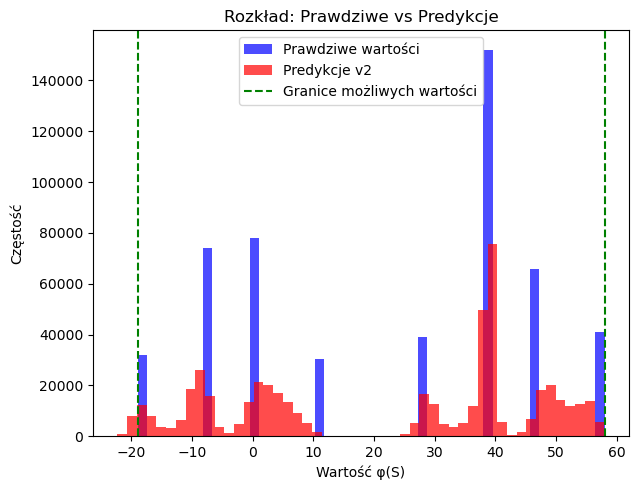

In [ ]:
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram predykcji vs rzeczywiste wartości
plt.subplot(1, 2, 1)
plt.hist(targets_v2, bins=50, alpha=0.7, label='Prawdziwe wartości', color='blue')
plt.hist(predictions_v2, bins=50, alpha=0.7, label='Predykcje v2', color='red')
plt.axvline(x=min(unique_labels), color='green', linestyle='--', label='Granice możliwych wartości')
plt.axvline(x=max(unique_labels), color='green', linestyle='--')
plt.xlabel('Wartość φ(S)')
plt.ylabel('Częstość')
plt.title('Rozkład: Prawdziwe vs Predykcje')
plt.legend()

plt.tight_layout()
plt.show()

### 6.3 Implementacja modelu klasyfikacyjnego
Nasz nowy model będzie wykorzystywał:

* LSTM do przetwarzania sekwencji binarnej
* Wszystkie stany ukryte zamiast tylko ostatniego (lub mechanizmu uwagi)
* Klasyfikację na 8 klas zamiast regresji

In [46]:
class ClfLSTM(nn.Module):
    def __init__(self, seq_length, possible_values, input_size=1, hidden_size=56, num_layers=2):
        super(ClfLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.seq_length = seq_length

        # LSTM - główna warstwa przetwarzająca sekwencję
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Parametry klasyfikacji
        self.possible_values = possible_values
        self.num_classes = len(possible_values)

        # Warstwa fully connected - używa wszystkich stanów ukrytych
        # KLUCZOWA RÓŻNICA: hidden_size * seq_length zamiast tylko hidden_size
        self.fc = nn.Linear(hidden_size * seq_length, self.num_classes)

        # Mapowanie między wartościami a indeksami klas
        self.label_to_index = {val: idx for idx, val in enumerate(possible_values)}
        self.index_to_label = {idx: val for val, idx in self.label_to_index.items()}

        # Informacje o modelu
        num_params = sum(p.numel() for p in self.parameters())
        print(f"Model klasyfikacyjny ClfLSTM:")
        print(f"  Liczba klas: {self.num_classes}")
        print(f"  Możliwe wartości: {possible_values}")
        print(f"  Liczba parametrów: {num_params:,}")

        if num_params > 50000:
            print(f"  ⚠️ UWAGA: Przekroczono limit 50,000 parametrów!")

    def forward(self, x, y=None):
        # Przygotowanie danych wejściowych
        x = x.float().unsqueeze(-1)  # (batch_size, seq_length, 1)
        batch_size = x.size(0)

        # Inicjalizacja stanów ukrytych LSTM
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size, device=x.device)

        # Forward pass przez LSTM
        lstm_out, _ = self.lstm(x, (h0, c0))  # (batch_size, seq_length, hidden_size)

        # KLUCZOWA RÓŻNICA: Flatten wszystkich stanów ukrytych
        # Zamiast używać tylko ostatniego stanu lub mechanizmu uwagi,
        # używamy informacji z wszystkich kroków czasowych
        flattened = lstm_out.reshape(batch_size, -1)  # (batch_size, seq_length * hidden_size)

        # Klasyfikacja
        logits = self.fc(flattened)  # (batch_size, num_classes)

        if y is not None:
            # Tryb treningowy - konwertuj targety na indeksy klas
            y = y.float().view(-1)
            y_class_indices = torch.tensor([self.label_to_index[val] for val in y.tolist()],
                                         dtype=torch.long, device=x.device)
            return logits, y_class_indices
        else:
            # Tryb inferencji - konwertuj predykcje z powrotem na wartości
            predictions = torch.argmax(logits, dim=1)
            numerical_predictions = torch.tensor([self.index_to_label[idx] for idx in predictions.tolist()],
                                               dtype=torch.float, device=x.device)
            return numerical_predictions

Przygotowanie danych i modelu:


In [47]:
# Użyj wartości z analizy początkowej
possible_values = unique_labels
print(f"Wartości dla klasyfikacji: {possible_values}")

# Inicjalizacja modelu
your_model_v3 = ClfLSTM(24, possible_values).to(device)  # seq_length=24 z kontekstu zadania

Wartości dla klasyfikacji: [-19.0, -8.0, 0.0, 11.0, 28.0, 39.0, 47.0, 58.0]
Model klasyfikacyjny ClfLSTM:
  Liczba klas: 8
  Możliwe wartości: [-19.0, -8.0, 0.0, 11.0, 28.0, 39.0, 47.0, 58.0]
  Liczba parametrów: 49,512


### 6.4 Trening modelu klasyfikacyjnego

In [48]:
# Trening modelu v3
your_model_v3.train()

# Algorytm optymalizacji który aktualizuje wagi modelu
optimizer_v3 = optim.Adam(your_model_v3.parameters(), lr=0.01)

# Mierzy jak daleko są nasze predykcje od prawdy
# CrossEntropyLoss jest standardem dla klasyfikacji wieloklasowej
criterion_v3 = nn.CrossEntropyLoss()

train_losses_v3 = []

print("🚀 Rozpoczęcie treningu modelu klasyfikacyjnego (v3)...")

# Pętla treningowa z monitoringiem accuracy
train_iterator_v3 = iter(dl)

for epoch in range(ITERATIONS):
    try:
        inputs, targets = next(train_iterator_v3)
    except StopIteration:
        train_iterator_v3 = iter(dl)
        inputs, targets = next(train_iterator_v3)

    inputs, targets = inputs.to(device), targets.to(device).float()

    # Forward pass - model przewiduje klasy
    optimizer_v3.zero_grad()  # Wyzeruj gradienty z poprzedniej iteracji
    logits, class_targets = your_model_v3(inputs, y=targets)
    loss = criterion_v3(logits, class_targets)  # Oblicz błąd predykcji

    # Backward pass - propagacja wsteczna i aktualizacja wag
    loss.backward()            # Oblicz gradienty
    optimizer_v3.step()        # Aktualizuj wagi modelu

    train_losses_v3.append(loss.item())

    # Okresowe logowanie z accuracy
    if (epoch + 1) % 500 == 0:
        with torch.no_grad():
            predictions = torch.argmax(logits, dim=1)
            accuracy = (predictions == class_targets).float().mean().item()

        print(f"Epoch {epoch+1}/{ITERATIONS}")
        print(f"  Loss: {loss.item():.4f}")
        print(f"  Batch accuracy: {accuracy:.4f}")

print("✅ Trening modelu v3 zakończony.")


🚀 Rozpoczęcie treningu modelu klasyfikacyjnego (v3)...
Epoch 500/4000
  Loss: 0.3167
  Batch accuracy: 0.8828
Epoch 1000/4000
  Loss: 0.1225
  Batch accuracy: 0.9375
Epoch 1500/4000
  Loss: 0.0208
  Batch accuracy: 0.9922
Epoch 2000/4000
  Loss: 0.0255
  Batch accuracy: 0.9922
Epoch 2500/4000
  Loss: 0.0126
  Batch accuracy: 1.0000
Epoch 3000/4000
  Loss: 0.0017
  Batch accuracy: 1.0000
Epoch 3500/4000
  Loss: 0.0061
  Batch accuracy: 1.0000
Epoch 4000/4000
  Loss: 0.0009
  Batch accuracy: 1.0000
✅ Trening modelu v3 zakończony.


### 6.5 Analiza Wyników (Model v3)

In [49]:
final_val_mse = validate_model(your_model_v3, val_dl)
final_score = estimate_points(final_val_mse)

print(f"Finalne MSE na zbiorze walidacyjnym (v3): {final_val_mse:.4f}")
print(f"Estymowane punkty za zadanie (v3): {final_score}")

Finalne MSE na zbiorze walidacyjnym (v3): 1.0468
Estymowane punkty za zadanie (v3): 98


Jak widać, model który najlepiej wykorzystał wiedzę zdobytą na etapie eksploracji danych okazał się zdecydowanie najskuteczniejszy.

## 7. Bonus - Inne Podejścia do Rozwiązania

W trakcie analizy rozwinęliśmy i zoptymalizowaliśmy rozwiązanie oparte na architekturze LSTM z mechanizmem uwagi. Warto jednak pamiętać, że w nauce o danych rzadko istnieje jedna, słuszna droga do celu. Poniżej znajduje się przegląd kilku innych, ciekawych strategii, które również osiągnęły wysokie wyniki. Pokazują one, jak różnorodne techniki można zastosować do tego samego problemu.


### Sieć Konwolucyjna (CNN) do Regresji
Zamiast przetwarzać sekwencję krok po kroku, jak robią to sieci rekurencyjne, można użyć jednowymiarowych warstw konwolucyjnych (`Conv1d`). Działają one jak "przesuwne okna", które uczą się wykrywać lokalne wzorce (np. sekwencje `101` czy `0011`) niezależnie od ich pozycji w całym ciągu. Wyekstrahowane w ten sposób cechy są następnie przetwarzane przez standardowe warstwy w pełni połączone (MLP), aby przewidzieć ostateczną wartość liczbową.

**Kluczowa idea:** Skupienie się na lokalnych, powtarzalnych fragmentach sekwencji, zamiast na globalnych zależnościach dalekiego zasięgu.


### Sieci Rekurencyjne (GRU/LSTM) z Poolingiem
Standardowe sieci rekurencyjne, takie jak **GRU** czy **LSTM**, doskonale nadają się do analizy sekwencji. Zamiast jednak opierać decyzję wyłącznie na ostatnim stanie ukrytym (który może "zapomnieć" informacje z początku ciągu), można zastosować **agregację (pooling)**. Polega ona na zebraniu wszystkich stanów ukrytych z całej sekwencji i obliczeniu z nich jednej, wspólnej reprezentacji. Najpopularniejsze techniki to:
- **Średnia (Average Pooling):** Daje ogólny, uśredniony obraz całej sekwencji.
- **Maksymalna (Max Pooling):** Wyłapuje najważniejsze, najsilniejsze sygnały z dowolnego miejsca w sekwencji.
Połączenie obu tych technik daje modelowi jeszcze pełniejszy obraz danych.

**Kluczowa idea:** Uwzględnienie informacji z całej sekwencji, a nie tylko z jej końca, w celu uzyskania bardziej solidnej reprezentacji.


### Zmiana Perspektywy na Klasyfikację Wieloetykietową
To podejście opiera się na sprytnym przeformułowaniu problemu. Zakłada, że istnieją 3 ukryte podciągi o stałych wartościach. Zamiast przewidywać ich sumę, model posiada **trzy niezależne głowice**, z których każda odpowiada na pytanie "Czy podciąg X występuje w tej sekwencji?". Do treningu używa się funkcji straty `BCEWithLogitsLoss`, a końcowy wynik jest składany z binarnych odpowiedzi trzech głowic.

**Kluczowa idea:** Przekształcenie problemu regresji w problem klasyfikacji wieloetykietowej, co pozwala na niezależne modelowanie każdego z ukrytych wzorców.


### Architektura Zaawansowana (GRU + Uwaga + MoE)
To najbardziej złożone i najskuteczniejsze podejście, które łączy kilka nowoczesnych technik w jeden potężny model:
1.  **Baza (GRU):** Sieć rekurencyjna stanowi fundament do przetwarzania sekwencji.
2.  **Mechanizm Uwagi (Attention):** Dodatkowa warstwa, która pozwala modelowi dynamicznie ważyć i skupiać się na najważniejszych bitach w sekwencji.
3.  **Mieszanka Ekspertów (Mixture of Experts - MoE):** Zamiast jednego modelu, trenowanych jest kilka mniejszych "ekspertów", z których każdy może specjalizować się w innym rodzaju wzorców. Dodatkowa sieć, tzw. "bramka" (gate), uczy się, któremu ekspertowi zaufać dla danej próbki.

**Kluczowa idea:** Budowa złożonej, modułowej architektury, gdzie każdy komponent ma wyspecjalizowane zadanie, co prowadzi do osiągnięcia najwyższej możliwej precyzji.

Te rozwiązania możesz znaleźć tu: https://github.com/MIKOmath/OAI-Zadania/tree/main/olimpiada/II-OAI/1-etap/5.podciagi